In [2]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# To make your plots cooler
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
dataset=pd.read_csv('Accident_people_2021_2022.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17919 entries, 0 to 17918
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    17919 non-null  int64 
 1   File_Num                      17919 non-null  object
 2   District                      17919 non-null  object
 3   Neighbourhood                 17919 non-null  object
 4   Street_name                   17919 non-null  object
 5   Day_name                      17919 non-null  object
 6   year                          17919 non-null  int64 
 7   month                         17919 non-null  int64 
 8   Month_name                    17919 non-null  object
 9   day                           17919 non-null  int64 
 10  Day_shift                     17919 non-null  object
 11  hour                          17919 non-null  int64 
 12  Pedestrian_situation          17919 non-null  object
 13  Vehicle_type    

TO STUDY THE VEHICLES WE ONLY COUNT THE DRIVERS, BECAUSE MAYBE THE SAME CAR IS COUNTED IN THE DRIVER AND PASSANGER, THIS IS BECAUSE IT CAN ONLY BE ONE DRIVER FOR VEHICLE.

In [4]:
driver_dataset= dataset[dataset['Person_type'] == 'Driver']
plt.rcParams['font.size'] = 10.0

<AxesSubplot:>

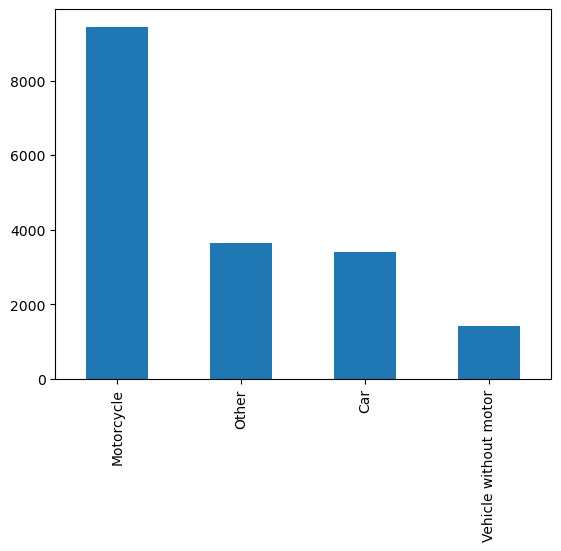

In [5]:
dataset['Vehicle_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

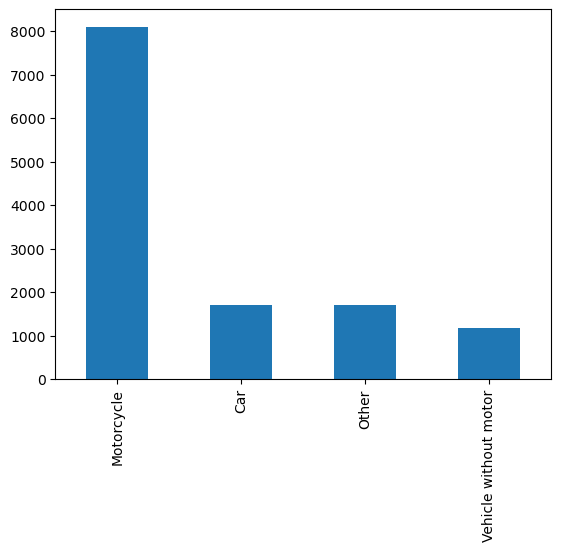

In [6]:
driver_dataset['Vehicle_type'].value_counts().plot(kind='bar')

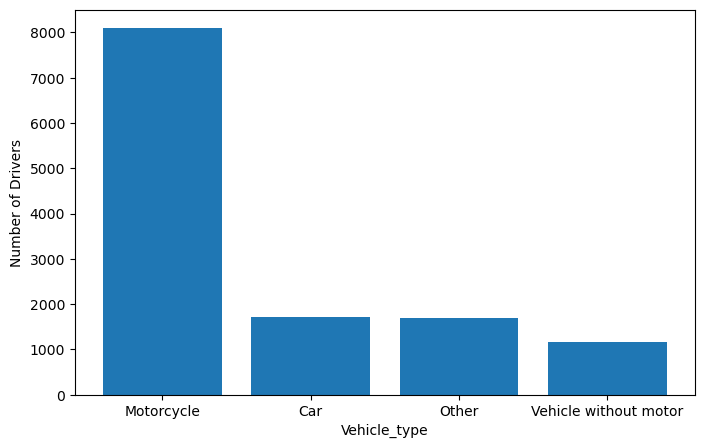

In [7]:
drivers_by_vehicle = driver_dataset['Vehicle_type'].value_counts()

# Create a bar plot of the accidents by district
fig = plt.figure(figsize=(8, 5))
plt.bar(drivers_by_vehicle.index, drivers_by_vehicle.values)

# Add axis labels and a title to the plot
plt.xlabel('Vehicle_type')
plt.ylabel('Number of Drivers')
plt.title('')

# Display the plot
plt.show()

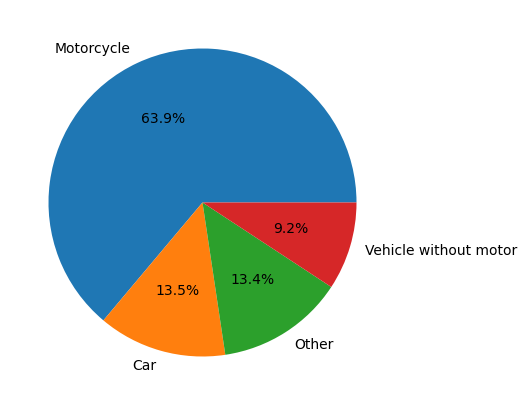

In [12]:
accidents_by_severity = driver_dataset['Vehicle_type'].value_counts()

fig = plt.figure(figsize=(5, 5))
plt.pie(accidents_by_severity.values, labels=accidents_by_severity.index, autopct='%1.1f%%')

# Display the plot
plt.show()

<Figure size 2500x600 with 0 Axes>

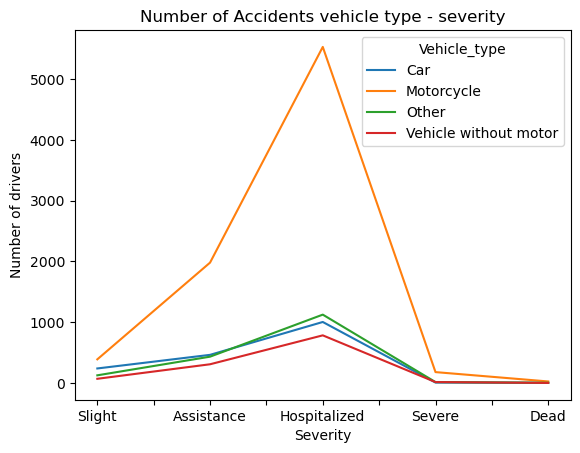

In [9]:
# Group the data by district and severity, then count the number of accidents in each category
counts = driver_dataset.groupby(['Vehicle_type', 'Accident_severity'], as_index=False).count()
b= counts.iloc[:,:3]

grouped = b.groupby(['Vehicle_type', 'Accident_severity']).sum().reset_index()

# Pivot the data so that each district has its own row and each severity has its own column
pivoted = pd.pivot_table(grouped, values='Unnamed: 0',index=['Accident_severity'], columns=['Vehicle_type'], fill_value=0)
fig = plt.figure(figsize=(25, 6))


# Plot the data
new_order = ['Slight','Assistance','Hospitalized','Severe','Dead']
df = pivoted.reindex(new_order)

df.plot(kind='line',)
# Set the plot title and axis labels
plt.title('Number of Accidents vehicle type - severity')
plt.xlabel('Severity')
plt.ylabel('Number of drivers')

# Show the plot
plt.show()

In [10]:
provaaa= pivoted.T
new_order = ['Slight','Assistance','Hospitalized','Severe','Dead']
df = provaaa.reindex(columns=new_order)
print(df)

Accident_severity      Slight  Assistance  Hospitalized  Severe  Dead
Vehicle_type                                                         
Car                       238         462          1003       6     2
Motorcycle                388        1980          5530     178    24
Other                     125         432          1124      14     3
Vehicle without motor      68         307           783      14     0


In [11]:
def row_to_percent(row):
    # Get the sum of the row
    row_sum = row.sum()
    # Divide each element in the row by the row sum and multiply by 100 to get the percentage
    return round(row.apply(lambda x: (x / row_sum) * 100),2)

# Select the rows that you want to convert to percentages and apply the function
df[['Slight', 'Assistance','Hospitalized','Severe','Dead']] = df[['Slight','Assistance','Hospitalized','Severe','Dead']].apply(row_to_percent, axis=1)
print(df)

Accident_severity      Slight  Assistance  Hospitalized  Severe  Dead
Vehicle_type                                                         
Car                     13.91       27.00         58.62    0.35  0.12
Motorcycle               4.79       24.44         68.27    2.20  0.30
Other                    7.36       25.44         66.20    0.82  0.18
Vehicle without motor    5.80       26.19         66.81    1.19  0.00
